In [121]:
import numpy as np
import matplotlib.pyplot as plt
from iLQR_APF import *
from Quadrotor import *
import APF_collision_avoidanca
from APF_collision_avoidanca import *
from sklearn.metrics import mean_squared_error


In [40]:
quadrotor = Quadrotor(0.2, 0.1, 5, 9.81, 0.01)
# time step s
quadrotor.dt = 0.01
# mass Kg
quadrotor.m = 1
# acceleration m/s^2
quadrotor.g = 9.81
# radius
quadrotor.r = 0.2
# inertia
quadrotor.I = 0.0133


N = 501
x_0 = np.array([620, 1.5, 0, 0, 0, 0]) 

x_bar = np.array([620, 5, 0, 0, 0, 0])

u_0 = np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])

u_bar= np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])


Q = np.identity(6)

R = np.identity(2)



In [41]:
# 1° DECOLLO X-Y -- BASE DI RICARICA A ZONA DI HOVERING

x_t_1, u_opt = LQR_2EQ(N, x_0, x_bar, u_0, u_bar, quadrotor, R, Q)
x1 = x_t_1.copy()

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\463978097.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[N-1], x_t_1[1,N-1], 'ro', color='g', markersize=10)


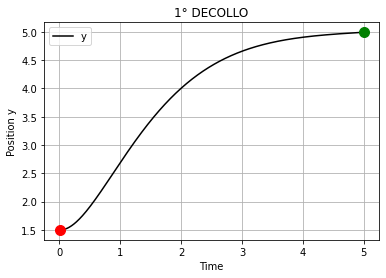

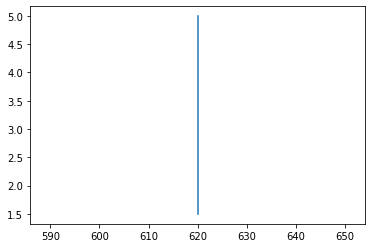

In [42]:
t = np.arange(N) * 0.01
plt.figure(2)

#plt.plot(t, x_t_1[0, 0:N], label="x",color='k',markersize=10)
plt.plot(t, x_t_1[1, 0:N], label="y",color='k',markersize=10)
plt.plot(t[1], x_t_1[1,0], 'ro', markersize=10)
plt.plot(t[N-1], x_t_1[1,N-1], 'ro', color='g', markersize=10)
#plt.plot(t[1], x_t_1[0,0], 'ro', markersize=10)
#plt.plot(t[N-1], x_t_1[0,N-1], 'ro', color='g', markersize=10)
plt.xlabel('Time')
plt.ylabel('Position y')
plt.grid()
plt.legend(loc="upper left")
plt.title("1° DECOLLO")
plt.show()
plt.plot(x_t_1[0,0:N-1],x_t_1[1,0:N-1])

In [43]:
mse_x = mean_squared_error([620,620], [x_t_1[0,0],x_t_1[0,N-1]])
mse_y = mean_squared_error([1.5,5], [x_t_1[1,1],x_t_1[1,N-1]])
print(mse_x,mse_y)


0.0 1.6861519708311813e-05


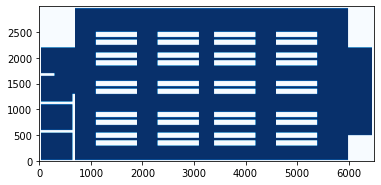

In [44]:
# 1° PLANNING TRAJECTORY X-Z --ZONA DI HOVERING A POSIZIONE DI PRELIEVO
# Generate some points
nrows = 3000;
ncols = 6500;
def create_obtacle(nrows,ncols):
    obstacle = np.zeros((nrows, ncols))
    [x, y] = np.meshgrid(np.arange(ncols), np.arange(nrows))

    # Generate some obstacle
    
    obstacle[0:20,:] =True;
    #obstacle[]
    obstacle[nrows-40:,:] = True;
    obstacle[:,0:40] = True;
    obstacle[:,ncols-40:] = True;
    
    
    
    obstacle[10:1300,650:700] = True;
    obstacle[550:600,0:700] = True;
    obstacle[1100:1150,0:700] = True;
    obstacle[1650:1700,0:300] = True;
    obstacle[2200:2250,0:700] = True;
    obstacle[2200:3000,0:700] = True;
    obstacle[2200:3000,6000:6500] = True;
    obstacle[10:500,6000:6500] = True;
    # X MAX 3000
    # Y MAX 5000
    
    obstacle[300:400,1100:1900] = True;
    obstacle[450:550,1100:1900] = True;
    
    obstacle[700:800,1100:1900] = True;
    obstacle[850:950,1100:1900] = True;
    
    obstacle[1300:1400,1100:1900] = True;
    obstacle[1450:1550,1100:1900] = True;
    
    obstacle[1850:1950,1100:1900] = True;
    obstacle[2000:2100,1100:1900] = True;
    
    obstacle[2250:2350,1100:1900] = True;
    obstacle[2400:2500,1100:1900] = True;
    
    
    obstacle[300:400,2300:3100] = True;
    obstacle[450:550,2300:3100] = True;
    
    obstacle[700:800,2300:3100] = True;
    obstacle[850:950,2300:3100] = True;
    
    obstacle[1300:1400,2300:3100] = True;
    obstacle[1450:1550,2300:3100] = True;
    
    obstacle[1850:1950,2300:3100] = True;
    obstacle[2000:2100,2300:3100] = True;
    
    obstacle[2250:2350,2300:3100] = True;
    obstacle[2400:2500,2300:3100] = True;
    
    
    obstacle[300:400,3400:4200] = True;
    obstacle[450:550,3400:4200] = True;
    
    obstacle[700:800,3400:4200] = True;
    obstacle[850:950,3400:4200] = True;
    
    obstacle[1300:1400,3400:4200] = True;
    obstacle[1450:1550,3400:4200] = True;
    
    obstacle[1850:1950,3400:4200] = True;
    obstacle[2000:2100,3400:4200] = True;
    
    obstacle[2250:2350,3400:4200] = True;
    obstacle[2400:2500,3400:4200] = True;
    
    
    obstacle[300:400,4600:5400] = True;
    obstacle[450:550,4600:5400] = True;
    
    obstacle[700:800,4600:5400] = True;
    obstacle[850:950,4600:5400] = True;
    
    obstacle[1300:1400,4600:5400] = True;
    obstacle[1450:1550,4600:5400] = True;
    
    obstacle[1850:1950,4600:5400] = True;
    obstacle[2000:2100,4600:5400] = True;
    
    obstacle[2250:2350,4600:5400] = True;
    obstacle[2400:2500,4600:5400] = True;



    return obstacle,x,y

    
obstacle,x,y = create_obtacle(nrows,ncols)

plt.imshow(obstacle, 'Blues_r', origin='lower')


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2382083607.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot (goal[0], goal[1], 'ro', color='green', markersize=10)


Reached the goal !


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2382083607.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


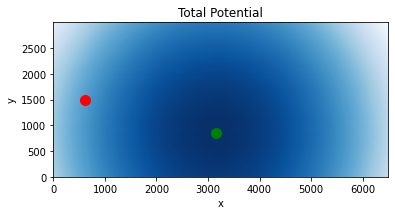

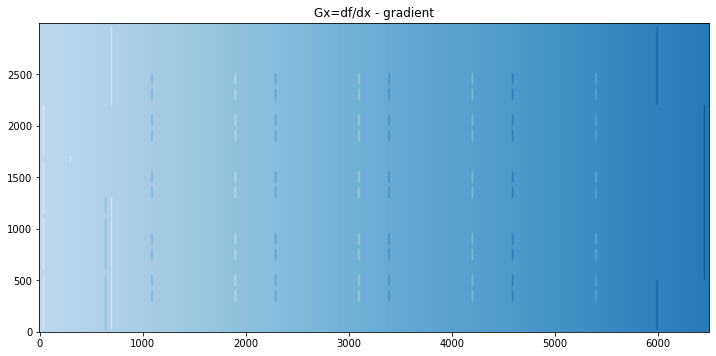

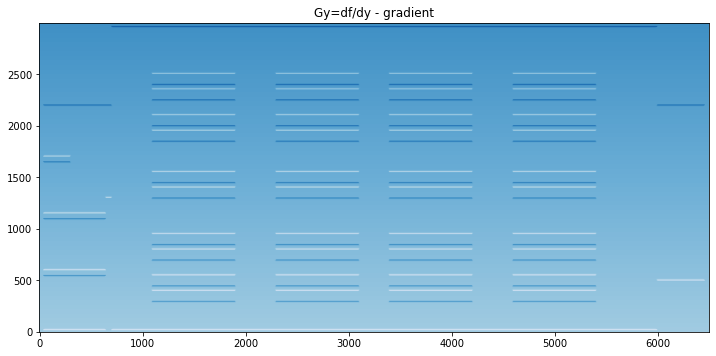

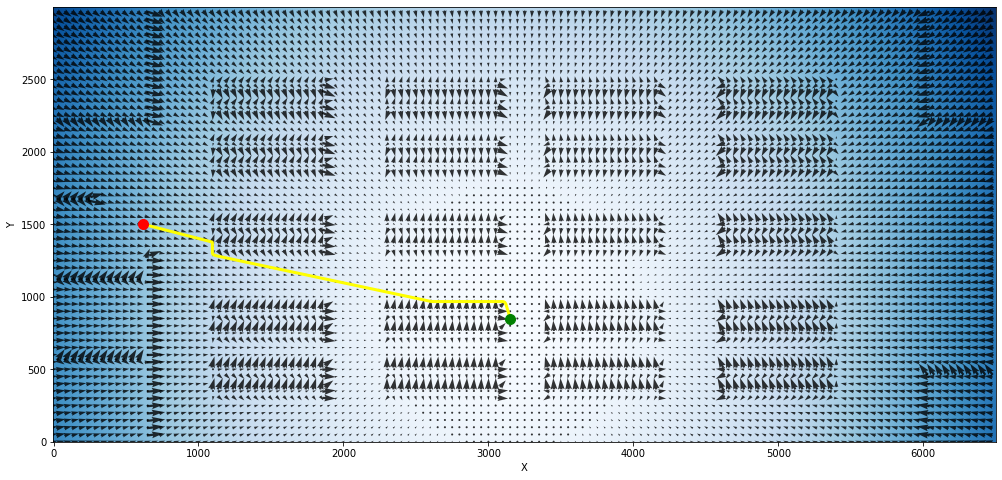

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2382083607.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


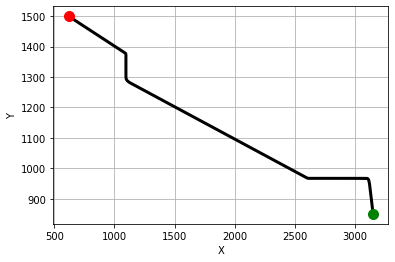

In [45]:

# Display repulsive potential
plt.imshow(APF_collision_avoidanca.repulsive(obstacle), 'gray', origin='lower')
plt.title ('Repulsive Potential')

# Compute attractive force
start = [620,1500]

goal= [3150, 850]


# Display attractive potential
plt.imshow(APF_collision_avoidanca.attractice(x,y,goal), 'gray',origin='lower')
plt.title ('Attractive Potential')
# Display 2D configuration space
plt.imshow(1-obstacle, 'Blues_r',origin='lower')
plt.plot (start[0], start[1], 'ro', markersize=10)
plt.plot (goal[0], goal[1], 'ro', color='green', markersize=10)
plt.xlabel ('x')
plt.ylabel ('y')

plt.title ('Configuration Space')
# Combine terms
f = APF_collision_avoidanca.attractice(x,y,goal) + APF_collision_avoidanca.repulsive(obstacle)
plt.imshow(f, 'Blues_r', origin='lower')
plt.title ('Total Potential')

# Plan route
route1 = APF_collision_avoidanca.GradientBasedPlanner(f, start, goal, 10000)

# Compute gradients for visualization
[gx, gy] = np.gradient(-f)
plt.figure(figsize=(12,8))
plt.imshow(gy, 'Blues_r',origin='lower')
plt.title('Gx=df/dx - gradient')
plt.figure(figsize=(12,8))
plt.imshow(gx, 'Blues_r',origin='lower')
plt.title('Gy=df/dy - gradient')

# Velocities plot
skip = 50
xidx = np.arange(0,ncols,skip)
yidx = np.arange(0,nrows,skip)

APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.plot(route1[:,0], route1[:,1],color='yellow', linewidth=3)
plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.imshow(f, 'Blues', origin='lower')
#plt.imshow(obstacle, 'Blues_r', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(1)
plt.plot(route1[:,0],route1[:,1],linewidth=3,color='k')
plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [46]:
x_new,y_new = APF_collision_avoidanca.Split_BacktrackStates(route1)
#new_route = APF_collision_avoidanca.Interpolation(x,y,2)
x = [int(x) for x in x_new]
y = [int(y) for y in y_new]
#print(x)
new_route = np.array(list(zip(x, y)))
#print(new_route.T)
print(len(new_route))

138


27600
[[ 6.20000000e+02  6.20000000e+02  6.20000000e+02 ...  3.14994651e+03
   3.14997778e+03  3.15000906e+03]
 [ 1.50000000e+03  1.50000000e+03  1.49999996e+03 ...  7.59702552e+02
   7.59123130e+02  7.58542726e+02]
 [ 0.00000000e+00  0.00000000e+00 -2.16853479e-03 ...  3.65780197e+01
   3.60416588e+01  3.55055395e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.12744662e+00
   3.12754748e+00  3.12760511e+00]
 [ 0.00000000e+00 -4.23439404e-03 -8.45231295e-03 ... -5.79422558e+01
  -5.80403072e+01 -5.81384122e+01]
 [ 0.00000000e+00 -2.16853479e-01 -4.21032785e-01 ... -5.36360905e+01
  -5.36119271e+01 -5.35998066e+01]]


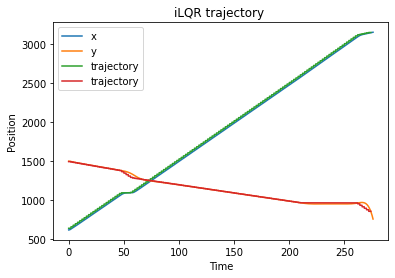

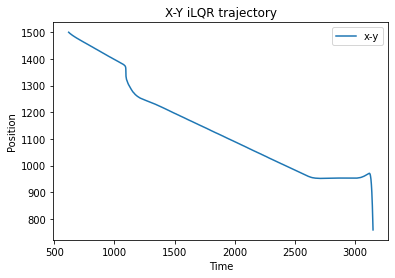

In [47]:
N = len(new_route)*200

print(N)
x_0 = np.array([start[0], start[1], 0, 0, 0, 0])
u_0 = np.array([(quadrotor.m * quadrotor.g) / 2, (quadrotor.m * quadrotor.g) / 2])
x_bar = np.zeros([6, N])

for i in range(1,len(new_route)):
    x_bar[0, i*200-200:200*i] = new_route[i][0]
    x_bar[1, i*200-200:200*i] = new_route[i][1]
# print()
# print(len(route))
# print(x_bar.shape[1])

# x_bar[0,N-100:N] = route[len(new_route)-1][0]
# x_bar[1,N-100:N] = route[len(new_route)-1][1]
u_bar = np.zeros([2, N-1])
u_bar[0, :] = np.repeat(((quadrotor.m * quadrotor.g) / 2), N-1)
u_bar[1, :] = np.repeat(((quadrotor.m * quadrotor.g) / 2), N-1)

# Q e R per iLQR
# matrice Q 6x6 -- State Cost matrix
Q = np.identity(6)*1
Q[0,0] = 5
Q[1,1] = 5
Q[2,2] = 10
Q[3,3] = 10
Q[4,4] = 10
Q[5,5] = 10
# matrice R 2x2 -- Input cost matrix
R = np.identity(2) * 1
R[0,0] = 2000
R[1,1] = 2000


#x_t, u_opt = iLQR(N, x_0, x_bar, u_0, u_bar, R, Q, quadrotor)
x_t, u_opt = LQR(N,x_0,x_bar,u_0,u_bar,quadrotor,R,Q)
x2 = x_t.copy()
print(x_t)

t = np.arange(N - 1) * 0.01

plt.figure(2)
plt.plot(t, x_t[0, 0:N - 1], label="x")
plt.plot(t, x_t[1, 0:N - 1], label="y")
plt.plot(t[0:N-200], x_bar[0, 0:N - 200], label="trajectory")
plt.plot(t[0:N-200], x_bar[1, 0:N - 200], label="trajectory")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(loc="upper left")
plt.title("iLQR trajectory ")
plt.show()

plt.figure(2)
plt.plot(x_t[0, 0:N - 1], x_t[1, 0:N - 1], label="x-y")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(loc="upper right")
plt.title("X-Y iLQR trajectory")
plt.show()

In [48]:
mse_x = mean_squared_error(x_bar[0,:N-200], x_t[0,:N-200])
mse_y = mean_squared_error(x_bar[1,:N-200], x_t[1,:N-200])
print(mse_x)
print(mse_y)
print(x_bar[0,:N-800])

488.55211866899947
186.1237206564941
[ 641.  641.  641. ... 3130. 3130. 3130.]


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1988980668.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


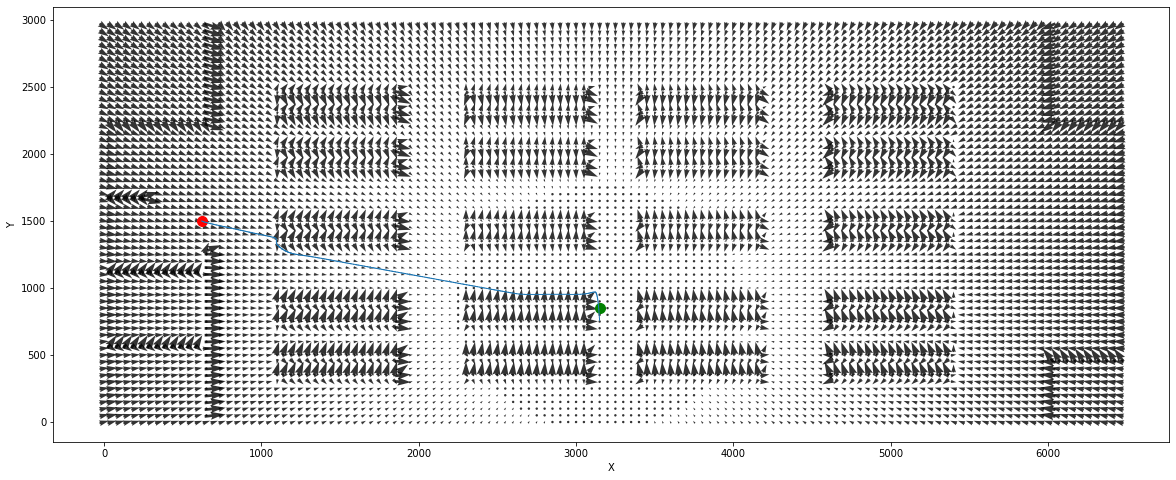

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1988980668.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(start[0], start[1],'ro',color='g', markersize=10)
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1988980668.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro',color='b', markersize=10)


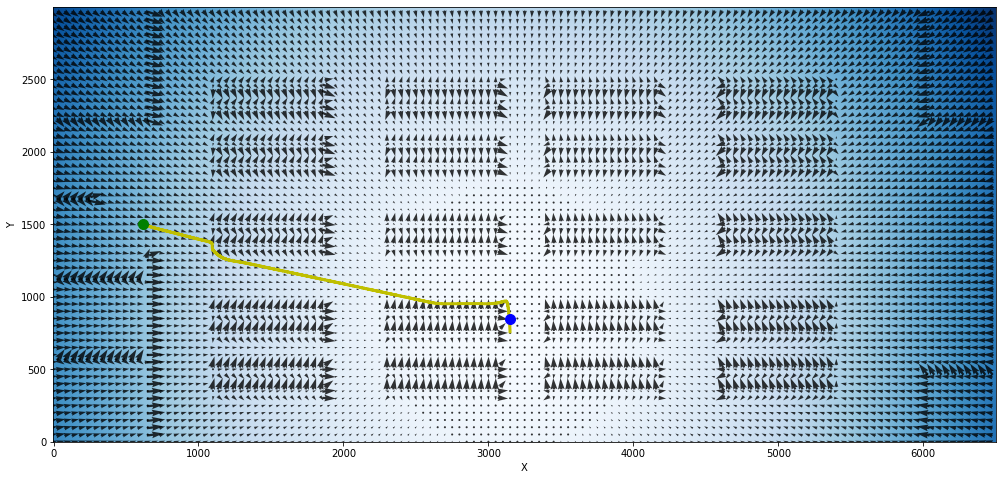

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1988980668.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


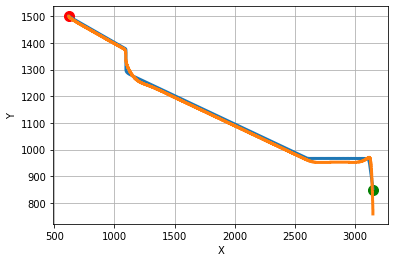

In [49]:
x_1 = [(int(x_t[0][i]),int(x_t[1][i])) for i in range(0,x_t.shape[1],2)]

x_2 = np.array(x_1)

skip = 50

xidx = np.arange(0,ncols,skip)
yidx = np.arange(0,nrows,skip)
    
obstacle,x,y = create_obtacle(nrows,ncols)
APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.plot(x_2[:,0], x_2[:,1], linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)

plt.plot(x_2[:14300,0], x_2[:14300,1], 'y',linewidth=3)
plt.plot(start[0], start[1],'ro',color='g', markersize=10)
plt.plot(goal[0], goal[1], 'ro',color='b', markersize=10)

# plt.plot(start[0], start[1],'ro',color='c',markersize=10)
# plt.plot(goal[0], goal[1], 'ro', color='b', markersize=10)
plt.imshow(f, 'Blues', origin='lower')
#plt.imshow(obstacle, 'Blues_r', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.plot(route1[:N-500,0], route1[:N-500,1], linewidth=3)
plt.plot(x_2[:N-500,0], x_2[:N-500,1], linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [50]:
# 1* ATTERRAGGIO DA HOVERING A ZONA DI PRELIEVO  
print(x_t[0,27599])
N_1 = 2000

x_0 = np.array([x_t[0,27599],  5, 0, 0, 0, 0])

x_bar = np.array([3150 , 2, 0, 0, 0, 0])

u_0 = np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])

u_bar= np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])


Q = np.identity(6)*250
Q[0,0] = 20
Q[1,1] = 20
Q[2,2] = 300
Q[3,3] = 300
Q[4,4] = 300
Q[5,5] = 300

R = np.identity(2)*100

x_t_3, u_opt = LQR_2EQ(N_1, x_0, x_bar, u_0, u_bar, quadrotor, R, Q)
x3 = x_t_3.copy()
print(x_t_3[0,N_1-1])
print(x_t_3[1,N_1-1])


3150.009057932766
3150.00011901088
2.0370359299635106


19.990000000000002


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2650890627.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[N_1-1], x_t_3[1,N_1-1], 'ro', color='g', markersize=10)


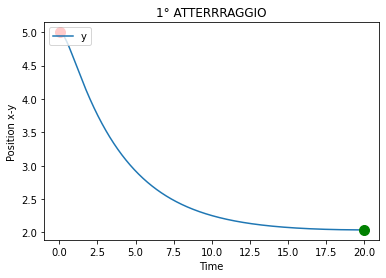

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2650890627.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[N_1-1], x_t_3[0,N_1-1], 'ro', color='g', markersize=10)


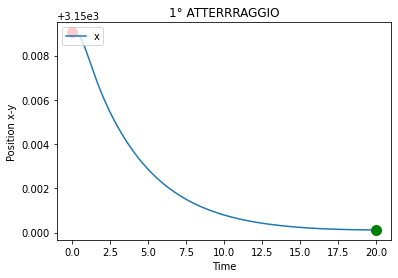

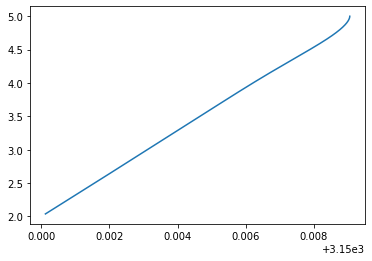

In [51]:
t = np.arange(N_1) * 0.01
print(t[N_1-1])
# plt.figure(2)
#plt.plot(t, x_t_3[0, 0:N_1], label="x")
plt.plot(t, x_t_3[1, 0:N_1], label="y")
#plt.plot(t, x_t_3[3, 0:N_1], label="VX")
#plt.plot(t, x_t_3[4, 0:N_1], label="Vy")
plt.plot(t[1], x_t_3[1,0], 'ro', markersize=10)
plt.plot(t[N_1-1], x_t_3[1,N_1-1], 'ro', color='g', markersize=10)

plt.xlabel('Time')
plt.ylabel('Position x-y')
plt.legend(loc="upper left")
plt.title("1° ATTERRRAGGIO")
plt.show()
plt.plot(t, x_t_3[0, 0:N_1], label="x")
plt.plot(t[1], x_t_3[0,0], 'ro', markersize=10)
plt.plot(t[N_1-1], x_t_3[0,N_1-1], 'ro', color='g', markersize=10)

plt.xlabel('Time')
plt.ylabel('Position x-y')
plt.legend(loc="upper left")
plt.title("1° ATTERRRAGGIO")
plt.show()

plt.plot(x_t_3[0, 0:N_1],x_t_3[1, 0:N_1], label="x")

In [52]:
mse_x = mean_squared_error([x_t[0,275],3150], [x_t_3[0,0],x_t_3[0,N_1-1]])
mse_y = mean_squared_error([5,2], [x_t_3[1,1],x_t_3[1,N_1-1]])
print(mse_y)
print(mse_x)

0.0006858300541310301
7.0817947908928755e-09


[[ 3.15000906e+03  3.15000906e+03  3.15000906e+03 ...  3.15000012e+03
   3.15000012e+03  3.15000012e+03]
 [ 5.00000000e+00  5.00000000e+00  5.00000000e+00 ...  2.03705623e+00
   2.03704607e+00  2.03703593e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.38651534e-07
  -7.38402647e-07 -7.38196163e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.33785714e-07
  -4.61322685e-07 -3.88884499e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.87182403e-02 ... -1.01584625e-03
  -1.01406717e-03 -1.01286690e-03]
 [ 0.00000000e+00  0.00000000e+00  7.00324006e-04 ...  2.48886853e-08
   2.06483368e-08  1.72487270e-08]]
501 27600 2000
30101
30101
[0.0000e+00 1.0000e-02 2.0000e-02 ... 3.0098e+02 3.0099e+02 3.0100e+02]


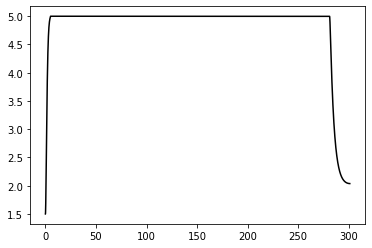

In [53]:
#PLOT COMPLETO ASSE X-Y
x_t[1,:] = 5
N_1 = x_t_1.shape[1]
N_2 = x_t.shape[1]
N_3 = x_t_3.shape[1]
print(x_t_3)
print(N_1,N_2,N_3)
N_tot = N_1+N_2 + N_3
print(N_tot)
x_T = np.empty([6, N_tot])
print(x_T.shape[1])

x_T[:,:501] = x_t_1
x_T[:,501:(N_1+N_2)] = x_t
x_T[:,(N_1+N_2):(N_1+N_2+N_3)] = x_t_3


t = np.arange(x_T.shape[1]) * 0.01
print(t)
plt.plot(t,x_T[1,:],'black')

In [56]:
# 2° DECOLLO ---- XY MASSA COSIDERATA 0.300KG

quadrotor = Quadrotor(0.2, 0.1, 5, 9.81, 0.01)
# time step s
quadrotor.dt = 0.01
# mass Kg
quadrotor.m = 1.3
# acceleration m/s^2
quadrotor.g = 9.81
# radius
quadrotor.r = 0.2
# inertia
quadrotor.I = 0.0173

N = 501
x_0 = np.array([3150, 2, 0, 0, 0, 0]) 

x_bar = np.array([3150 ,5, 0, 0, 0, 0])

u_0 = np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])

u_bar= np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])


Q = np.identity(6)

R = np.identity(2) 


In [57]:
# 2° DECOLLO X-Y -- BASE DI RICARICA A ZONA DI HOVERING

x_t_1_1, u_opt = LQR_2EQ(N, x_0, x_bar, u_0, u_bar, quadrotor, R, Q)

x4 = x_t_1_1.copy()

5.0


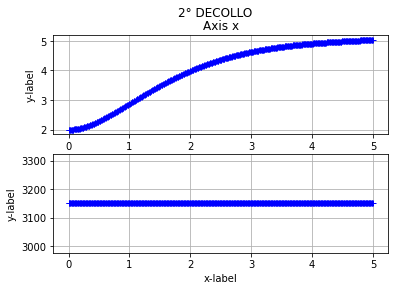

In [58]:
t = np.arange(N) * 0.01
print(t[N-1])
# plt.figure(2)
# #plt.plot(t, x_t[0, 0:N], label="x")
# plt.plot(t, x_t[1, 0:N], label="y")
# # plt.plot(t[0], x_bar[0], 'ro', markersize=5)
# # plt.plot(t[N-1], x_bar[1], 'ro', color='green', markersize=10)
# plt.xlabel('Time')
# plt.ylabel('Position x-y')
# plt.legend(loc="upper left")
# plt.title("1° DECOLLO")
# # plt.show()
# print(x_t[1,N-1])

fig, axs = plt.subplots(2)

fig.suptitle('2° DECOLLO')
axs[0].plot(t, x_t_1_1[1, 0:N], '+',label="y", color='b')
axs[0].set_title('Axis y')
axs[1].plot(t, x_t_1_1[0, 0:N], '+',label="x",color='b')
axs[0].set_title('Axis x')
axs[0].grid()
axs[1].grid()
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

In [59]:
mse_x = mean_squared_error([3150,3150], [x4[0,0],x4[0,N-1]])
mse_y = mean_squared_error([2,5], [x4[1,1],x4[1,N-1]])
print(mse_y)
print(mse_x)

0.0006032253123689418
0.0


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\708469205.py:101: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(620,1600, 'ro',color='r',marker="s" ,markersize=20,label='Charging Base')
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\708469205.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(620,1600, 'ro',color='r',marker="s" ,markersize=20,label='Charging Base')
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\708469205.py:102: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(start[0], start[1],'ro',marker="s",color='b',markersize=20,label='Picking Bay')
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\70846920

Text(0, 0.5, 'Y')

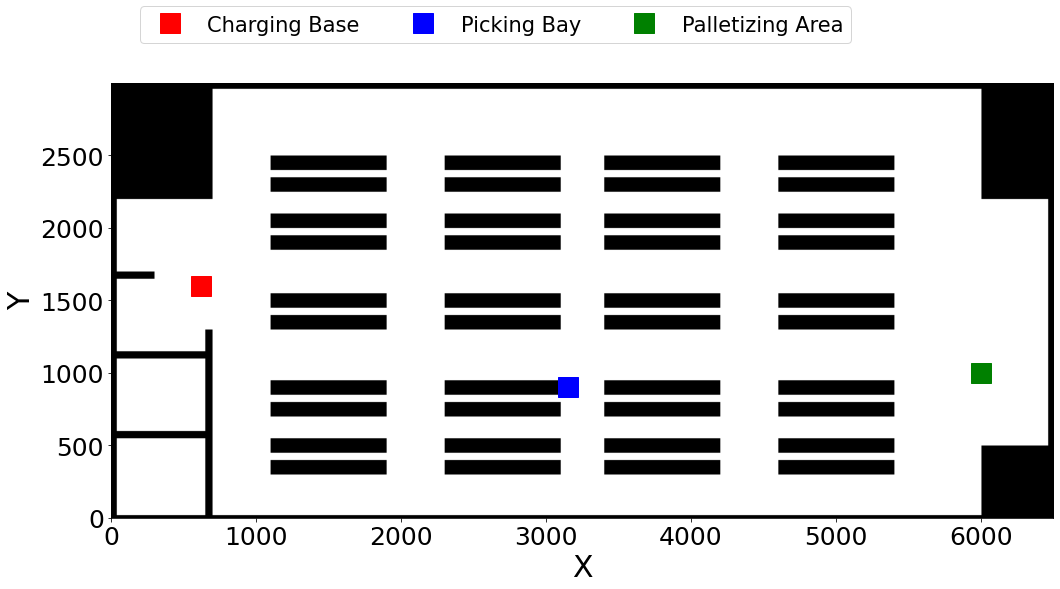

In [221]:
# 2° PLANNING TRAJECTORY X-Z --ZONA DI HOVERING A POSIZIONE DI PRELIEVO - MASSA 0.300KG

nrows = 3000;
ncols = 6500;
def create_obtacle(nrows,ncols):
    obstacle = np.zeros((nrows, ncols))
    [x, y] = np.meshgrid(np.arange(ncols), np.arange(nrows))

    # Generate some obstacle
    
    obstacle[0:20,:] =True;
    #obstacle[]
    obstacle[nrows-40:,:] = True;
    obstacle[:,0:40] = True;
    obstacle[:,ncols-40:] = True;
    
    
    
    obstacle[10:1300,650:700] = True;
    obstacle[550:600,0:700] = True;
    obstacle[1100:1150,0:700] = True;
    obstacle[1650:1700,0:300] = True;
    obstacle[2200:2250,0:700] = True;
    obstacle[2200:3000,0:700] = True;
    obstacle[2200:3000,6000:6500] = True;
    obstacle[10:500,6000:6500] = True;
    # X MAX 3000
    # Y MAX 5000
    
    obstacle[300:400,1100:1900] = True;
    obstacle[450:550,1100:1900] = True;
    
    obstacle[700:800,1100:1900] = True;
    obstacle[850:950,1100:1900] = True;
    
    obstacle[1300:1400,1100:1900] = True;
    obstacle[1450:1550,1100:1900] = True;
    
    obstacle[1850:1950,1100:1900] = True;
    obstacle[2000:2100,1100:1900] = True;
    
    obstacle[2250:2350,1100:1900] = True;
    obstacle[2400:2500,1100:1900] = True;
    
    
    obstacle[300:400,2300:3100] = True;
    obstacle[450:550,2300:3100] = True;
    
    obstacle[700:800,2300:3100] = True;
    obstacle[850:950,2300:3100] = True;
    
    obstacle[1300:1400,2300:3100] = True;
    obstacle[1450:1550,2300:3100] = True;
    
    obstacle[1850:1950,2300:3100] = True;
    obstacle[2000:2100,2300:3100] = True;
    
    obstacle[2250:2350,2300:3100] = True;
    obstacle[2400:2500,2300:3100] = True;
    
    
    obstacle[300:400,3400:4200] = True;
    obstacle[450:550,3400:4200] = True;
    
    obstacle[700:800,3400:4200] = True;
    obstacle[850:950,3400:4200] = True;
    
    obstacle[1300:1400,3400:4200] = True;
    obstacle[1450:1550,3400:4200] = True;
    
    obstacle[1850:1950,3400:4200] = True;
    obstacle[2000:2100,3400:4200] = True;
    
    obstacle[2250:2350,3400:4200] = True;
    obstacle[2400:2500,3400:4200] = True;
    
    
    obstacle[300:400,4600:5400] = True;
    obstacle[450:550,4600:5400] = True;
    
    obstacle[700:800,4600:5400] = True;
    obstacle[850:950,4600:5400] = True;
    
    obstacle[1300:1400,4600:5400] = True;
    obstacle[1450:1550,4600:5400] = True;
    
    obstacle[1850:1950,4600:5400] = True;
    obstacle[2000:2100,4600:5400] = True;
    
    obstacle[2250:2350,4600:5400] = True;
    obstacle[2400:2500,4600:5400] = True;



    return obstacle,x,y


obstacle,x,y = create_obtacle(nrows,ncols)
import matplotlib.cm as cm
plt.figure(figsize=(20,8))
plt.plot(620,1600, 'ro',color='r',marker="s" ,markersize=20,label='Charging Base')
plt.plot(start[0], start[1],'ro',marker="s",color='b',markersize=20,label='Picking Bay')

plt.plot(goal[0], goal[1], 'ro', color='g',marker="s", markersize=20,label='Palletizing Area')
plt.imshow(obstacle,'binary' ,origin='lower')
#plt.colorbar()
plt.legend(loc="upper left", prop={'size':21}, 
           bbox_to_anchor=(0.02, 1.20
                          ), ncol=3)

plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.xlabel('X',size=30)
plt.ylabel('Y',size=30)



C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\786652288.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot (goal[0], goal[1], 'ro', color='green', markersize=10)


Reached the goal !


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\786652288.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(620,1500, 'ro',color='g', markersize=10)
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\786652288.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(start[0], start[1],'ro', color = 'b', markersize=10)
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\786652288.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1],'ro',color =  'r',markersize=10)


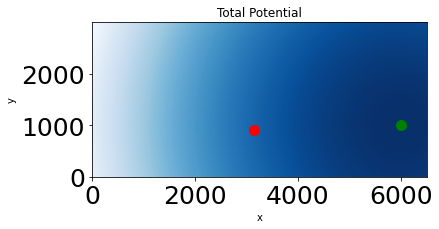

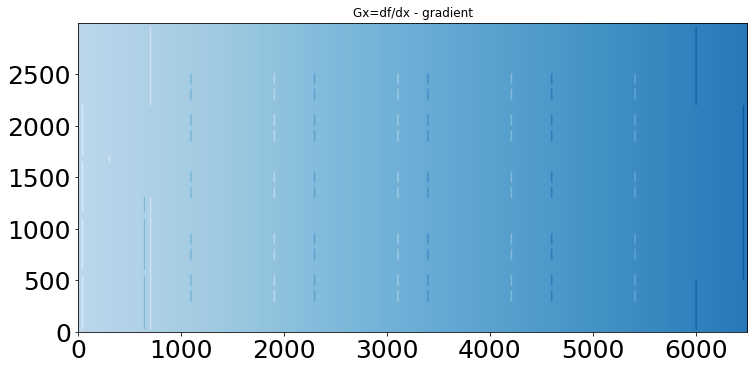

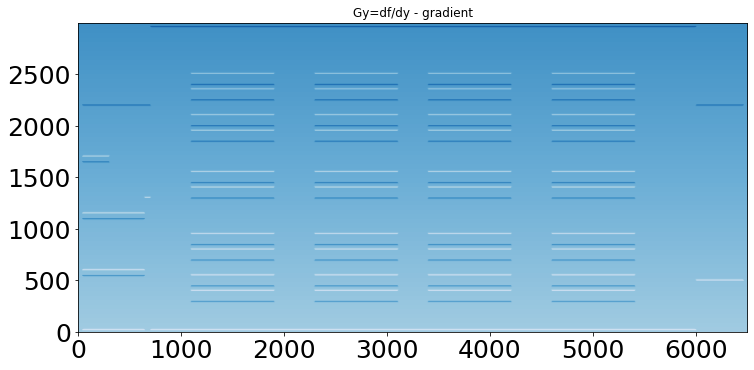

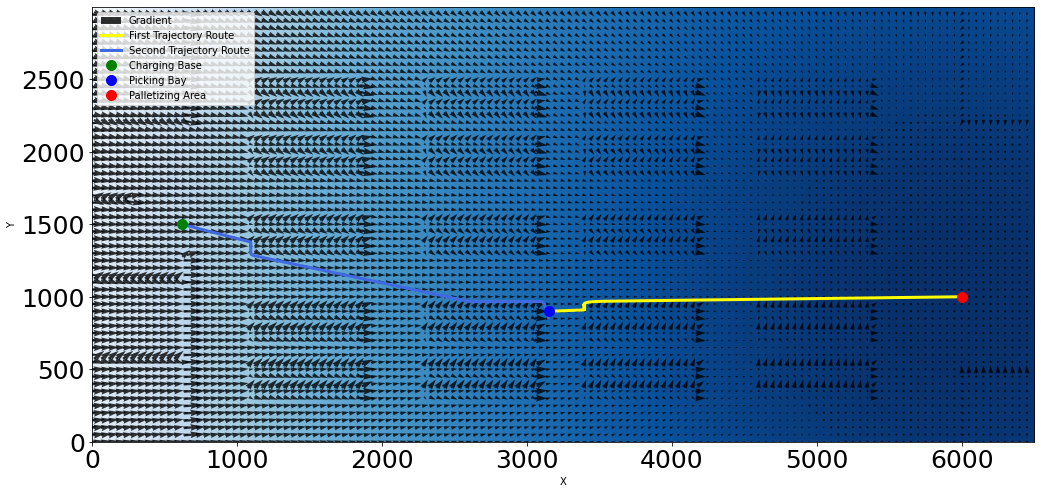

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\786652288.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


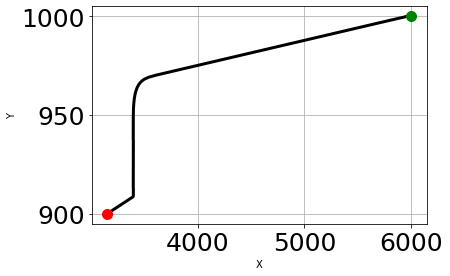

In [218]:

# Display repulsive potential
plt.imshow(APF_collision_avoidanca.repulsive(obstacle), 'gray', origin='lower')
plt.title ('Repulsive Potential')

# Compute attractive force
start = [3150, 900]

goal= [6000, 1000]
obstacle,x,y = create_obtacle(nrows,ncols)
# Display attractive potential
plt.imshow(APF_collision_avoidanca.attractice(x,y,goal), 'gray',origin='lower')
plt.title ('Attractive Potential')
# Display 2D configuration space
plt.imshow(1-obstacle, 'Blues_r',origin='lower')
plt.plot (start[0], start[1], 'ro', markersize=10)
plt.plot (goal[0], goal[1], 'ro', color='green', markersize=10)
plt.xlabel ('x')
plt.ylabel ('y')

plt.title ('Configuration Space')
# Combine terms
f = APF_collision_avoidanca.attractice(x,y,goal) + APF_collision_avoidanca.repulsive(obstacle)
plt.imshow(f, 'Blues_r', origin='lower')
plt.title ('Total Potential')

# Plan route
route2 = APF_collision_avoidanca.GradientBasedPlanner(f, start, goal, 10000)

# Compute gradients for visualization
[gx, gy] = np.gradient(-f)
plt.figure(figsize=(12,8))
plt.imshow(gy, 'Blues_r',origin='lower')
plt.title('Gx=df/dx - gradient')
plt.figure(figsize=(12,8))
plt.imshow(gx, 'Blues_r',origin='lower')
plt.title('Gy=df/dy - gradient')

# Velocities plot
skip = 10
xidx = np.arange(0,ncols,skip)
yidx = np.arange(0,nrows,skip)

APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.plot(route2[:,0], route2[:,1],color='yellow',linewidth=3,alpha=1)
plt.plot(route1[:,0], route1[:,1],color = 'royalblue', linewidth=3)
plt.plot(620,1500, 'ro',color='g', markersize=10)
plt.plot(start[0], start[1],'ro', color = 'b', markersize=10)
plt.plot(goal[0], goal[1],'ro',color =  'r',markersize=10)
plt.imshow(f, 'Blues_r', origin='lower')
#plt.imshow(obstacle, 'Blues_r', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Gradient','First Trajectory Route ','Second Trajectory Route','Charging Base','Picking Bay','Palletizing Area'],loc="upper left")
plt.show()

plt.figure(1)
plt.plot(route2[:,0],route2[:,1],linewidth=3,color='k')
plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [64]:
x_new,y_new = APF_collision_avoidanca.Split_BacktrackStates(route2)
#new_route = APF_collision_avoidanca.Interpolation(x,y,2)
x = [int(x) for x in x_new]
y = [int(y) for y in y_new]
print(x)
new_route = np.array(list(zip(x, y)))
#print(new_route.T)
#print(len(new_route))

[3151, 3171, 3191, 3211, 3231, 3251, 3271, 3291, 3311, 3331, 3351, 3371, 3391, 3396, 3396, 3396, 3396, 3397, 3397, 3397, 3404, 3423, 3443, 3463, 3483, 3503, 3523, 3543, 3563, 3583, 3603, 3623, 3643, 3663, 3683, 3703, 3723, 3743, 3763, 3783, 3803, 3823, 3843, 3863, 3883, 3903, 3923, 3943, 3963, 3983, 4003, 4023, 4043, 4063, 4083, 4103, 4123, 4143, 4163, 4183, 4203, 4223, 4243, 4263, 4283, 4303, 4323, 4343, 4363, 4383, 4403, 4423, 4443, 4463, 4483, 4503, 4523, 4543, 4563, 4583, 4603, 4623, 4643, 4663, 4683, 4703, 4723, 4743, 4763, 4783, 4803, 4823, 4843, 4863, 4883, 4903, 4923, 4943, 4963, 4983, 5003, 5023, 5043, 5063, 5083, 5103, 5123, 5143, 5163, 5183, 5203, 5223, 5243, 5263, 5283, 5303, 5323, 5343, 5363, 5383, 5403, 5423, 5443, 5463, 5483, 5503, 5523, 5542, 5562, 5582, 5602, 5622, 5642, 5662, 5682, 5702, 5722, 5742, 5762, 5782, 5802, 5822, 5842, 5862, 5882, 5902, 5922, 5942, 5962, 5982]


30000
[[ 3.15000000e+03  3.15000000e+03  3.15000000e+03 ...  5.99334019e+03
   5.99345326e+03  5.99356634e+03]
 [ 9.00000000e+02  9.00000000e+02  9.00000000e+02 ...  9.57356450e+02
   9.57117339e+02  9.56877251e+02]
 [ 0.00000000e+00  0.00000000e+00 -7.29879950e-03 ...  1.06269096e+02
   1.05863472e+02  1.05459975e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.13073419e+01
   1.13076054e+01  1.13078347e+01]
 [ 0.00000000e+00 -8.70414851e-16 -1.72306613e-15 ... -2.39111429e+01
  -2.40088083e+01 -2.41067446e+01]
 [ 0.00000000e+00 -7.29879950e-01 -1.38693770e+00 ... -4.05623621e+01
  -4.03497593e+01 -4.02421922e+01]]


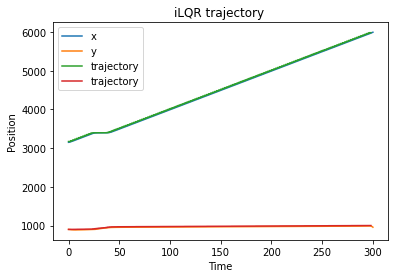

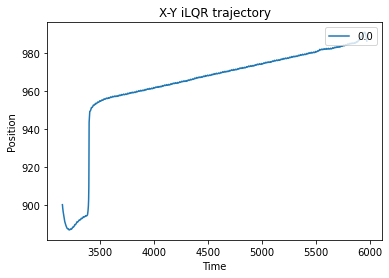

In [65]:

N = len(new_route)*200

print(N)
x_0 = np.array([3150, 900, 0, 0, 0, 0])
u_0 = np.array([(quadrotor.m * quadrotor.g) / 2, (quadrotor.m * quadrotor.g) / 2])
x_bar = np.zeros([6, N])

for i in range(1,len(new_route)):
    x_bar[0, i*200-200:200*i] = new_route[i][0]
    x_bar[1, i*200-200:200*i] = new_route[i][1]
# print()
# print(len(route))
# print(x_bar.shape[1])

# x_bar[0,N-100:N] = route[len(new_route)-1][0]
# x_bar[1,N-100:N] = route[len(new_route)-1][1]
u_bar = np.zeros([2, N-1])
u_bar[0, :] = np.repeat(((quadrotor.m * quadrotor.g) / 2), N-1)
u_bar[1, :] = np.repeat(((quadrotor.m * quadrotor.g) / 2), N-1)

# Q e R per iLQR
# matrice Q 6x6 -- State Cost matrix
Q = np.identity(6)*1
Q[0,0] = 100
Q[1,1] = 100
Q[2,2] = 200
Q[3,3] = 200
Q[4,4] = 200
Q[5,5] = 200
# matrice R 2x2 -- Input cost matrix
R = np.identity(2) * 1
R[0,0] = 2000
R[1,1] = 2000


#x_t, u_opt = iLQR(N, x_0, x_bar, u_0, u_bar, R, Q, quadrotor)
x_t_1_2, u_opt = LQR(N,x_0,x_bar,u_0,u_bar,quadrotor,R,Q)
x5 = x_t_1_2.copy()
print(x_t_1_2)

t = np.arange(N - 1) * 0.01

plt.figure(2)
plt.plot(t, x_t_1_2[0, 0:N - 1], label="x")
plt.plot(t, x_t_1_2[1, 0:N - 1], label="y")
plt.plot(t[0:N-200], x_bar[0, 0:N - 200], label="trajectory")
plt.plot(t[0:N-200], x_bar[1, 0:N - 200], label="trajectory")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(loc="upper left")
plt.title("iLQR trajectory ")
plt.show()

plt.figure(2)
plt.plot(x_t_1_2[0, 0:N - 200], x_t_1_2[1, 0:N - 200], label="x-y")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(t,loc="upper right")
plt.title("X-Y iLQR trajectory")
plt.show()

In [66]:
mse_x = mean_squared_error(x_bar[0,:N-500], x5[0,:N-500])
mse_y = mean_squared_error(x_bar[1,:N-500], x5[1,:N-500])
print(mse_x)
print(mse_y)


441.9998368204477
175.92568191635104


In [ ]:
x_1 = [(int(x_t_1_2[0][i]),int(x_t_1_2[1][i])) for i in range(0,x_t_1_2.shape[1],2)]

x_2_1 = np.array(x_1)

skip = 50

xidx = np.arange(0,ncols,skip)
yidx = np.arange(0,nrows,skip)

APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
# plt.plot(start[0], start[1], 'ro', markersize=10)
# plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
# plt.plot(x_2[:,0], x_2[:,1], linewidth=1)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
obstacle,x,y = create_obtacle(nrows,ncols)
APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)

plt.plot(x_2_1[:,0], x_2_1[:,1],'b', linewidth=3)
plt.plot(start[0], start[1],'ro' ,markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)


#plt.imshow(obstacle, 'Blues_r', origin='lower')
#plt.imshow(f, 'Blues_r', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.imshow(obstacle, 'Blues_r', origin='lower')
plt.plot(x_2[:14300,0], x_2[:14300,1],color='mediumorchid',linewidth=3,label='First Free Flight without Load' )
plt.plot(x_2_1[:,0], x_2_1[:,1],color='gold', linewidth=3,label='Second Free Flight with Load')
plt.plot(620,1500, 'ro',color='r', markersize=10,label='Charging Base')
plt.plot(start[0], start[1],'ro',color='b',markersize=10,label='Picking Bay')
plt.plot(goal[0], goal[1], 'ro', color='g', markersize=10,label='Palletizing Area')
#plt.imshow(obstacle, 'Blues_r', origin='lower')
#plt.imshow(f, 'PuBu', origin='lower')
plt.imshow(f, 'Blues', origin='lower',alpha=0.9)
#plt.colorbar()
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.legend(loc="upper left")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.plot(start[0], start[1], 'ro', markersize=10)
plt.plot(goal[0], goal[1], 'ro', color='green', markersize=10)
plt.plot(route[:,0], route[:,1], linewidth=3)
plt.plot(x_2[:,0], x_2[:,1], linewidth=3)

APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1980015960.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(620,1500, 'ro',color='r', markersize=20,label='Charging Base')
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1980015960.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(start[0], start[1],'ro',color='b',markersize=20,label='Picking Bay')
C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\1980015960.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(goal[0], goal[1], 'ro', color='g', markersize=20,label='Palletizing Area')


<Figure size 720x576 with 0 Axes>

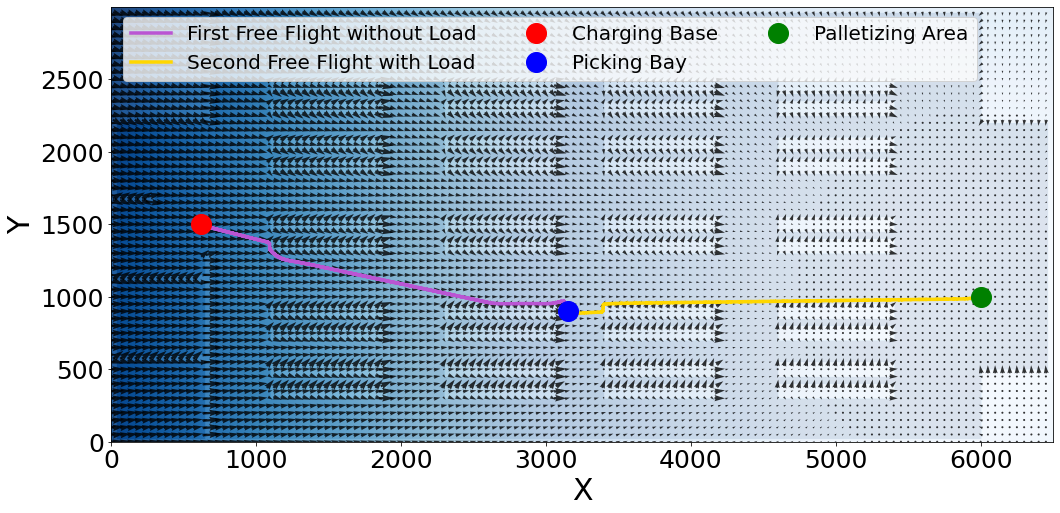

In [183]:
plt.figure(figsize=(10,8))
APF_collision_avoidanca.gradient_plot(x,y, gy,gx, skip=50)
plt.imshow(obstacle, 'Blues_r', origin='lower')
plt.plot(x_2[:13500,0], x_2[:13500,1],color='mediumorchid',linewidth=3.5,label='First Free Flight without Load' )
plt.plot(x_2_1[:,0], x_2_1[:,1],color='gold', linewidth=3.5,label='Second Free Flight with Load')
plt.plot(620,1500, 'ro',color='r', markersize=20,label='Charging Base')
plt.plot(start[0], start[1],'ro',color='b',markersize=20,label='Picking Bay')
plt.plot(goal[0], goal[1], 'ro', color='g', markersize=20,label='Palletizing Area')

plt.imshow(obstacle, 'Blues_r')

plt.imshow(f, 'Blues', origin='lower',alpha=0.9)
# plt.colorbar()
plt.legend(loc="upper left", prop={'size':20}, 
           bbox_to_anchor=(0.002, 1
                          ), ncol=3)

plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.xlabel('X',size=30)
plt.ylabel('Y',size=30)
plt.show()

## 3400 950 punto dello scaffale 


In [74]:
import math

p = [3500,950]
q = [x_2_1[1500,0], x_2_1[1500,1]]

# Calculate Euclidean distance
print (math.dist(p, q))

110.06361796706486


(6, 30000)
6000.0
2.002518159299962
19.990000000000002


C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2625200332.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[N_1-1], x_t_4[1,N_1-1], 'ro', color='g', markersize=10)


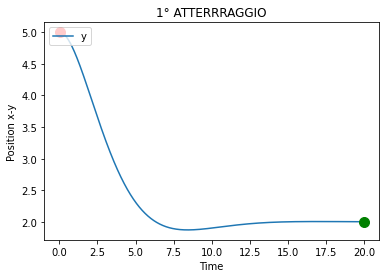

C:\Users\anto-\AppData\Local\Temp\ipykernel_18060\2625200332.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[N_1-1], x_t_4[0,N_1-1], 'ro', color='g', markersize=10)


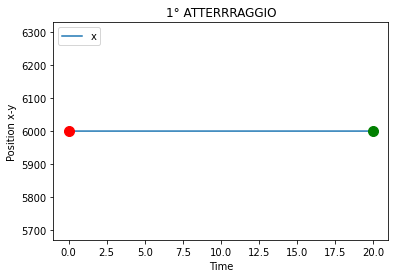

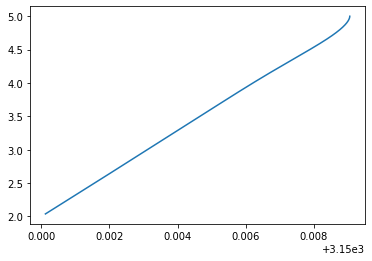

In [75]:
# 2* ATTERRAGGIO DA HOVERING A ZONA DI PRELIEVO  
print(x_t_1_2.shape)
N_1 = 2000

x_0 = np.array([6000,  5, 0, 0, 0, 0])

x_bar = np.array([6000 , 2, 0, 0, 0, 0])

u_0 = np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])

u_bar= np.array([quadrotor.m*quadrotor.g/2,quadrotor.m*quadrotor.g/2])


Q = np.identity(6)*250
Q[0,0] = 200
Q[1,1] = 200
Q[2,2] = 10
Q[3,3] = 10
Q[4,4] = 10
Q[5,5] = 10

R = np.identity(2)*3000

x_t_4, u_opt = LQR_2EQ(N_1, x_0, x_bar, u_0, u_bar, quadrotor, R, Q)
print(x_t_4[0,N_1-1])
print(x_t_4[1,N_1-1])
x6=x_t_4.copy()
t = np.arange(N_1) * 0.01
print(t[N_1-1])
# plt.figure(2)
#plt.plot(t, x_t_3[0, 0:N_1], label="x")
plt.plot(t, x_t_4[1, 0:N_1], label="y")
#plt.plot(t, x_t_3[3, 0:N_1], label="VX")
#plt.plot(t, x_t_3[4, 0:N_1], label="Vy")
plt.plot(t[1], x_t_4[1,0], 'ro', markersize=10)
plt.plot(t[N_1-1], x_t_4[1,N_1-1], 'ro', color='g', markersize=10)

plt.xlabel('Time')
plt.ylabel('Position x-y')
plt.legend(loc="upper left")
plt.title("1° ATTERRRAGGIO")
plt.show()
plt.plot(t, x_t_4[0, 0:N_1], label="x")
plt.plot(t[1], x_t_4[0,0], 'ro', markersize=10)
plt.plot(t[N_1-1], x_t_4[0,N_1-1], 'ro', color='g', markersize=10)

plt.xlabel('Time')
plt.ylabel('Position x-y')
plt.legend(loc="upper left")
plt.title("1° ATTERRRAGGIO")
plt.show()

plt.plot(x_t_3[0, 0:N_1],x_t_3[1, 0:N_1], label="x")

In [76]:
mse_x = mean_squared_error([6000,6000],[x_t_4[0,0],x_t_4[0,N_1-1]])
mse_y = mean_squared_error([5,2], [x_t_4[1,0],x_t_4[1,N_1-1]])
print(mse_x)
print(mse_y)
print(x_t_4[1,0])
print(x_t_4[1,N_1-1])
RMSE = math.sqrt(MSE)



0.0
3.1705631299923242e-06
5.0
2.002518159299962


NameError: name 'MSE' is not defined

In [77]:
######
# primo decollo x-z 
# xs = 0 a N_1 pari ai valori di x di  x_t_1[0,:N_1] 
# ys = 0 da 0 a N_1
# zs = 0 a N_1 pari ai valori di y di x_t_1[1,:N_1]

xT = np.zeros([3,62002])

# x_t_1 1° decollo 
# x_t  1° tracking
# x_t_3 1° atterraggio
N_1 = x1.shape[1]
N_2 = x2.shape[1]
N_3 = x3.shape[1]
print(N_1+N_2+N_3)
print(x_t_1[1,N_1-1])
xT[0,0:N_1] = x1[0,:]
xT[1,0:N_1] = 1500
xT[2,0:N_1] = x1[1,:]


######
# primo hovering 
# xs_1 = da N_1 a N_2 valori pari a x_t[0,N_2]
# ys_1 = da N_1 a N_2 valori pari a x_t[1,N_2]
# zs_1 = 5 da N_1 a N_1+N_2
######
print(x1[0,N_1-1])
print(x1[1,N_1-1])
print(x2[0,1])
print(x2[1,1])

xT[0,N_1:(N_1+N_2)] = x2[0,:]
xT[1,N_1:(N_1+N_2)] = x2[1,:]
xT[2,N_1:(N_1+N_2)] = 5


# primo atterraggio ù
# xs_2 = da N_2+N_1 a N_2 +N_1+N_3 pari ai valori di x di  x_t_3[0,:N_3] 
# ys_2 = 0 da 0 a N_1
# zs_2 = 0 a N_1 pari ai valori di y di x_t_3[1,:N_3]
xT[0,(N_1+N_2):(N_1+N_2+N_3)] = x3[0,:]
xT[1,(N_1+N_2):(N_1+N_2+N_3)] = np.linspace(764,850,N_3)
xT[2,(N_1+N_2):(N_1+N_2+N_3)] = x3[1,:]

# x_t_1_1 2° decollo 
# x_t_1_2  2° tracking
# x_t_4 2° atterraggio
N_4 = x4.shape[1]
N_5 = x5.shape[1]
N_6 = x6.shape[1]

print(N_1+N_2+N_3+N_4+N_5+N_6)

xT[0,(N_1+N_2+N_3):(N_1+N_2+N_3+N_4)] = x4[0,:]
xT[1,(N_1+N_2+N_3):(N_1+N_2+N_3+N_4)] = 850
xT[2,(N_1+N_2+N_3):(N_1+N_2+N_3+N_4)] = x4[1,:]


######
# primo hovering 
# xs_1 = da N_1 a N_2 valori pari a x_t[0,N_2]
# ys_1 = da N_1 a N_2 valori pari a x_t[1,N_2]
# zs_1 = 5 da N_1 a N_1+N_2
######

xT[0,(N_1+N_2+N_3+N_4):(N_1+N_2+N_3+N_4+N_5)] = x5[0,:]
xT[1,(N_1+N_2+N_3+N_4):(N_1+N_2+N_3+N_4+N_5)] = x5[1,:]
xT[2,(N_1+N_2+N_3+N_4):(N_1+N_2+N_3+N_4+N_5)] = 5

print(x5[0,N_5-1])
print(x5[1,N_5-1])
print(x6[0,1])
print(x6[1,1])



# primo atterraggio 
# xs_2 = da N_2+N_1 a N_2 +N_1+N_3 pari ai valori di x di  x_t_3[0,:N_3] 
# ys_2 = 0 da 0 a N_1
# zs_2 = 0 a N_1 pari ai valori di y di x_t_3[1,:N_3]
xT[0,(N_1+N_2+N_3+N_4+N_5):(N_1+N_2+N_3+N_4+N_5+N_6)] = x6[0,:]
xT[1,(N_1+N_2+N_3+N_4+N_5):(N_1+N_2+N_3+N_4+N_5+N_6)] = np.linspace(968,1000,N_6)
xT[2,(N_1+N_2+N_3+N_4+N_5):(N_1+N_2+N_3+N_4+N_5+N_6)] = x6[1,:]


fig = plt.figure()


xs= xT[0,:(N_1+N_2+N_3+N_4+N_5+N_6)]
ys = xT[1,:(N_1+N_2+N_3+N_4+N_5+N_6)]
zs = xT[2,:(N_1+N_2+N_3+N_4+N_5+N_6)]
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot3D(xs, ys, zs,color='b',markersize=3)
ax.plot(xT[0,0], xT[1,0],xT[2,0],  markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7, alpha=0.6)
ax.plot(xT[0,N_1], xT[1,N_1],xT[2,N_1],  markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7, alpha=0.6)
ax.plot(xT[0,(N_1+N_2)], xT[1,(N_1+N_2)],xT[2,(N_1+N_2)],  markerfacecolor='k', markeredgecolor='k', marker='x', markersize=7, alpha=0.6)
ax.plot(xT[0,(N_1+N_2+N_3)], xT[1,(N_1+N_2+N_3)],xT[2,(N_1+N_2+N_3)],  markerfacecolor='k', markeredgecolor='k', marker='x', markersize=7, alpha=0.6)
ax.plot(xT[0,(N_1+N_2+N_3+N_4)], xT[1,(N_1+N_2+N_3+N_4)],xT[2,(N_1+N_2+N_3+N_4)],  markerfacecolor='k', markeredgecolor='k', marker='x', markersize=7, alpha=0.6)
ax.plot(xT[0,(N_1+N_2+N_3+N_4+N_5)], xT[1,(N_1+N_2+N_3+N_4+N_5)],xT[2,(N_1+N_2+N_3+N_4+N_5)],  markerfacecolor='g', markeredgecolor='g', marker='o', markersize=7, alpha=0.6)
ax.plot(xT[0,(N_1+N_2+N_3+N_4+N_5+N_6)-1], xT[1,(N_1+N_2+N_3+N_4+N_5+N_6)-1],xT[2,(N_1+N_2+N_3+N_4+N_5+N_6)-1],  markerfacecolor='g', markeredgecolor='g', marker='o', markersize=7, alpha=0.6)
fig.subplots_adjust(top=2.1, bottom=-.2)
#ax.scatter(xs,ys,zs)

ax.set_title('Quadrotor Traiectory')
ax.view_init(20, 50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

30101
4.994192845841841
620.0
4.994192845841841
620.0
1500.0
62602
5993.566340882414
956.8772505742452
6000.0
5.0


ValueError: could not broadcast input array from shape (2000,) into shape (1400,)